# Problem 4.3 - Synthetic data creation using GMMs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

In [2]:
colors = np.load('./Data/4.3/colors.pkl', allow_pickle=True)

### Used GMM to cluster the data into 7 components

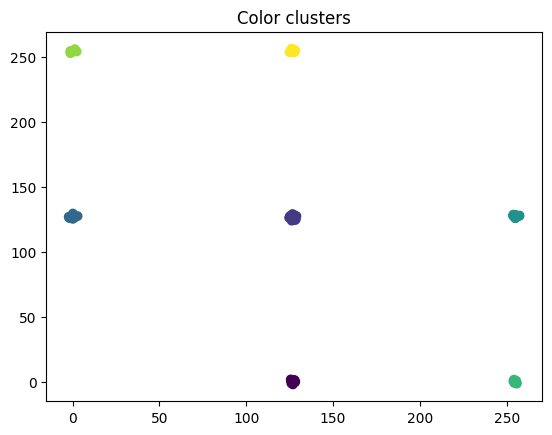

In [3]:
gmm = GaussianMixture(n_components=7).fit(colors)
color_labels = gmm.predict(colors)
plt.scatter(colors[:, 0], colors[:, 1], c=color_labels)
plt.title('Color clusters')
plt.show()

### Randomly choose a component for each data point and sample the data point from it

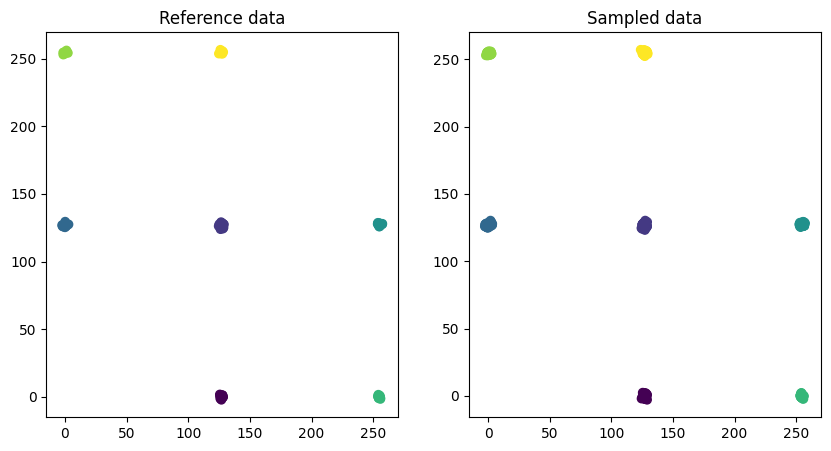

In [4]:
def sample_colors_from_model(n_components=7, means=None, covariances=None, n_samples=500):
    sampled_colors = []
    sampled_color_labels = []

    component_choices = np.random.choice(n_components, size=n_samples)
    for component in component_choices:
        sampled_colors.append(multivariate_normal.rvs(mean=means[component], cov=covariances[component]))
        sampled_color_labels.append(component)

    return np.array(sampled_colors), np.array(sampled_color_labels)

sampled_colors, sampled_color_labels = sample_colors_from_model(n_components=7, means=gmm.means_, covariances=gmm.covariances_, n_samples=500)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(colors[:, 0], colors[:, 1], c=color_labels)
axs[0].set_title('Reference data')

axs[1].scatter(sampled_colors[:, 0], sampled_colors[:, 1], c=sampled_color_labels)
axs[1].set_title('Sampled data')

plt.show()

- ### As we can see from the comaprision plots, the synthetic data generated by us is similar in nature and distribution to the original data
- ### Hence, GMMs are very useful and effective in generating data similar to the provided data